Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Cross-Validation Score: 0.9666666666666668


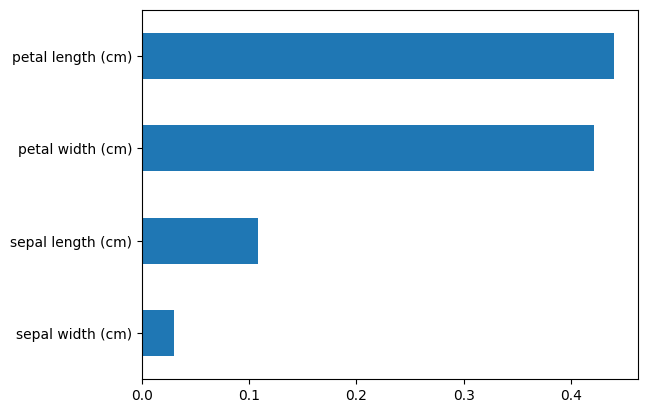

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
from sklearn.datasets import load_iris
data = load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(i) for i in np.unique(y)],
    filled=True, rounded=True
)
graph = graphviz.Source(dot_data)
graph
train_acc = dt.score(X_train, y_train)
test_acc = dt.score(X_test, y_test)
dt_pruned = DecisionTreeClassifier(
    max_depth=3,     # limits tree depth
    min_samples_split=5,
    random_state=42
)
dt_pruned.fit(X_train, y_train)
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pruned.predict(X_test)))
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)
importances.sort_values().plot(kind="barh")
cv_scores = cross_val_score(
    rf, X, y, cv=5
)
print("Cross-Validation Score:", cv_scores.mean())
